<a href="https://colab.research.google.com/github/pd047/Breast-Cancer-Detection/blob/main/Boardgame_reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving games.csv to games (2).csv


In [ ]:
games = pd.read_csv('games.csv')

In [ ]:
games.head()

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,12333,boardgame,Twilight Struggle,2005.0,2.0,2.0,180.0,180.0,180.0,13.0,20113,8.33774,8.22186,26647,372,1219,5865,5347,2562,3.4785
1,120677,boardgame,Terra Mystica,2012.0,2.0,5.0,150.0,60.0,150.0,12.0,14383,8.28798,8.14232,16519,132,1586,6277,2526,1423,3.8939
2,102794,boardgame,Caverna: The Cave Farmers,2013.0,1.0,7.0,210.0,30.0,210.0,12.0,9262,8.28994,8.06886,12230,99,1476,5600,1700,777,3.7761
3,25613,boardgame,Through the Ages: A Story of Civilization,2006.0,2.0,4.0,240.0,240.0,240.0,12.0,13294,8.20407,8.05804,14343,362,1084,5075,3378,1642,4.1590
4,3076,boardgame,Puerto Rico,2002.0,2.0,5.0,150.0,90.0,150.0,12.0,39883,8.14261,8.04524,44362,795,861,5414,9173,5213,3.2943


In [ ]:
print(games.columns)
print(games.shape)

Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')
(81312, 20)


In [ ]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81312 entries, 0 to 81311
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    81312 non-null  int64  
 1   type                  81312 non-null  object 
 2   name                  81271 non-null  object 
 3   yearpublished         81309 non-null  float64
 4   minplayers            81309 non-null  float64
 5   maxplayers            81309 non-null  float64
 6   playingtime           81309 non-null  float64
 7   minplaytime           81309 non-null  float64
 8   maxplaytime           81309 non-null  float64
 9   minage                81309 non-null  float64
 10  users_rated           81312 non-null  int64  
 11  average_rating        81312 non-null  float64
 12  bayes_average_rating  81312 non-null  float64
 13  total_owners          81312 non-null  int64  
 14  total_traders         81312 non-null  int64  
 15  total_wanters      

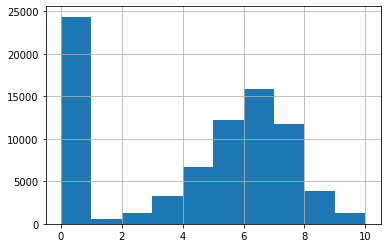

In [ ]:
games['average_rating'].hist()
plt.show()

In [ ]:
zeroes = games[games['average_rating']==0]
zeroes.head()

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
13048,318,boardgame,Looney Leo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0,0,1,0,0,0.0
13068,579,boardgame,Field of Fire,2002.0,2.0,0.0,0.0,0.0,0.0,12.0,0,0.0,0.0,2,0,0,1,0,0,0.0
13114,894,boardgame,LifeLinks,2000.0,1.0,8.0,10.0,10.0,10.0,8.0,0,0.0,0.0,2,0,1,1,0,0,0.0
13116,897,boardgame,Dear Abby,1992.0,3.0,4.0,60.0,60.0,60.0,13.0,0,0.0,0.0,7,1,0,0,0,0,0.0
13124,946,boardgame,Rolazone,1999.0,2.0,2.0,30.0,30.0,30.0,0.0,0,0.0,0.0,0,0,0,3,0,0,0.0


In [ ]:
zeroes.shape

(24380, 20)

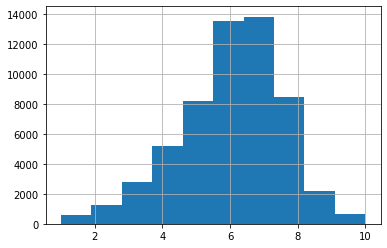

(56894, 20)


In [ ]:
games = games[games['users_rated']>0]

games = games.dropna(axis=0)

games['average_rating'].hist()
plt.show()

print(games.shape)

In [ ]:
games['type'].value_counts()

boardgame             48039
boardgameexpansion     8855
Name: type, dtype: int64

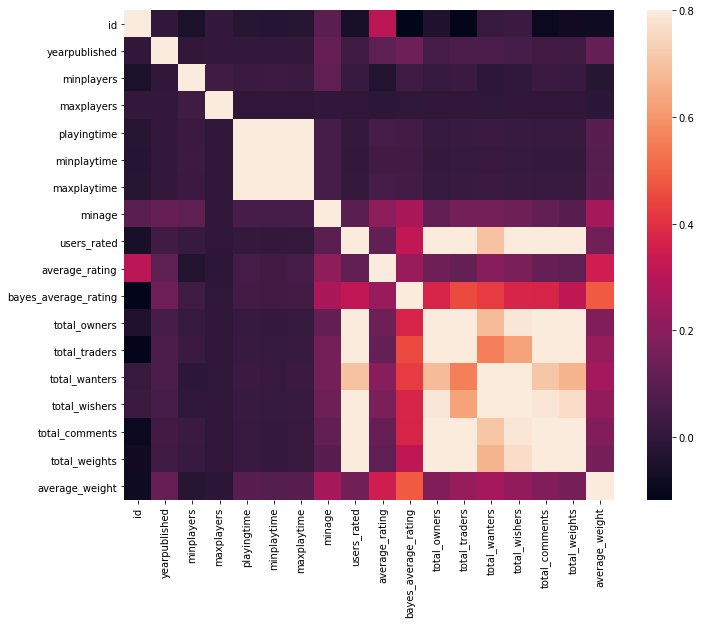

In [ ]:
corrmat = games.corr()
fig = plt.figure(figsize=(12,9))

sns.heatmap(corrmat, vmax=0.8, square=True)
plt.show()

In [ ]:
target = games['average_rating']

target.shape

(56894,)

In [ ]:
games = games.drop(['id', 'name', 'type', 'average_rating', 'bayes_average_rating'], axis=1)
print(games.shape)
print(games.head())

(56894, 15)
   yearpublished  minplayers  ...  total_weights  average_weight
0         2005.0         2.0  ...           2562          3.4785
1         2012.0         2.0  ...           1423          3.8939
2         2013.0         1.0  ...            777          3.7761
3         2006.0         2.0  ...           1642          4.1590
4         2002.0         2.0  ...           5213          3.2943

[5 rows x 15 columns]


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(games, target, test_size = 0.20, random_state = 1)

print(X_train.shape)
print(y_train.shape)

(45515, 15)
(45515,)


In [ ]:
print(X_test.shape)

(11379, 15)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error

LR = LinearRegression()

LR.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
pred = LR.predict(X_test)

MSE = mean_squared_error(y_test, pred)

print(MSE)

2.0878654278597417


In [ ]:
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor(n_estimators=100, min_samples_leaf=10, random_state=1)
RFR.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=10,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

In [ ]:
pred = RFR.predict(X_test)

MSE = mean_squared_error(y_test, pred)

print(MSE)

1.4575588917181705


In [ ]:
X_test.iloc[0]

yearpublished     2013.0000
minplayers           2.0000
maxplayers           4.0000
playingtime         30.0000
minplaytime         30.0000
maxplaytime         30.0000
minage              10.0000
users_rated       1119.0000
total_owners      1892.0000
total_traders       43.0000
total_wanters      246.0000
total_wishers      609.0000
total_comments     327.0000
total_weights       88.0000
average_weight       1.8977
Name: 2602, dtype: float64

In [ ]:
rating_lr=LR.predict(X_test.iloc[0].values.reshape(1,-1))
rating_rfr=RFR.predict(X_test.iloc[0].values.reshape(1,-1))

print(rating_lr)
print(rating_rfr)

[7.16683099]
[6.98339228]


In [ ]:
y_test.iloc[0]

7.06652